In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Asus/Desktop/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
corrmat=data.corr

In [8]:
corrmat()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


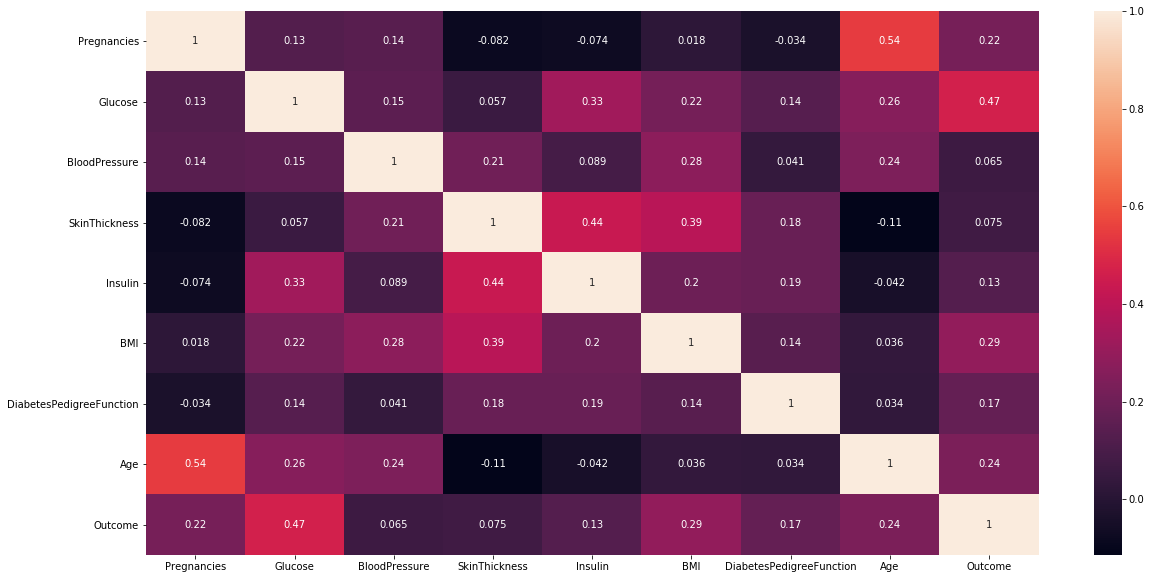

In [9]:
import seaborn as sns
corrmat = data.corr()
corr_feature = corrmat.index
plt.figure(figsize=(20,10))
plot = sns.heatmap(data[corr_feature].corr(),annot=True)

In [10]:
diabetes_true = len(data.loc[data['Outcome']==1])
diabetes_false = len(data.loc[data['Outcome']==0])

In [11]:
diabetes_true,diabetes_false

(268, 500)

In [12]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data['Outcome']

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)

In [16]:
print("No. of rows missing Pregnancies:{0}".format(len(data.loc[data['Pregnancies']==0])))
print("No. of rows missing Glucose:{0}".format(len(data.loc[data['Glucose']==0])))
print("No. of rows missing BloodPressure:{0}".format(len(data.loc[data['BloodPressure']==0])))
print("No. of rows missing SkinThickness:{0}".format(len(data.loc[data['SkinThickness']==0])))
print("No. of rows missing Insulin:{0}".format(len(data.loc[data['Insulin']==0])))
print("No. of rows missing BMI:{0}".format(len(data.loc[data['BMI']==0])))
print("No. of rows missing DiabetesPedigreeFunction:{0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("No. of rows missing Age:{0}".format(len(data.loc[data['Age']==0])))

No. of rows missing Pregnancies:111
No. of rows missing Glucose:5
No. of rows missing BloodPressure:35
No. of rows missing SkinThickness:227
No. of rows missing Insulin:374
No. of rows missing BMI:11
No. of rows missing DiabetesPedigreeFunction:0
No. of rows missing Age:0


In [17]:
from sklearn.preprocessing import Imputer
fill_values = Imputer(missing_values=0,strategy="mean",axis=0)
x_train = fill_values.fit_transform(x_train)
x_test = fill_values.fit_transform(x_test)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [19]:
predict_train_data = rf.predict(x_test)

In [20]:
from sklearn import metrics
print("Accurecy = {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accurecy = 0.727
